<a href="https://colab.research.google.com/github/Kritikargv17/Deep-Learning-LAB/blob/main/Exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data: (60000, 784) (60000, 10)
Testing data: (10000, 784) (10000, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 - 8s - 18ms/step - accuracy: 0.8090 - loss: 0.5270 - val_accuracy: 0.8645 - val_loss: 0.3772
Epoch 2/10
469/469 - 9s - 19ms/step - accuracy: 0.8570 - loss: 0.3907 - val_accuracy: 0.8751 - val_loss: 0.3423
Epoch 3/10
469/469 - 7s - 15ms/step - accuracy: 0.8704 - loss: 0.3559 - val_accuracy: 0.8745 - val_loss: 0.3443
Epoch 4/10
469/469 - 6s - 13ms/step - accuracy: 0.8770 - loss: 0.3336 - val_accuracy: 0.8790 - val_loss: 0.3251
Epoch 5/10
469/469 - 7s - 15ms/step - accuracy: 0.8820 - loss: 0.3181 - val_accuracy: 0.8833 - val_loss: 0.3234
Epoch 6/10
469/469 - 10s - 22ms/step - accuracy: 0.8885 - loss: 0.3035 - val_accuracy: 0.8891 - val_loss: 0.3079
Epoch 7/10
469/469 - 6s - 13ms/step - accuracy: 0.8912 - loss: 0.2914 - val_accuracy: 0.8853 - val_loss: 0.3043
Epoch 8/10
469/469 - 7s - 16ms/step - accuracy: 0.8942 - loss: 0.2822 - val_accuracy: 0.8875 - val_loss: 0.2977
Epoch 9/10
469/469 - 6s - 13ms/step - accuracy: 0.8959 - loss: 0.2752 - val_accuracy: 0.8926 - val_loss

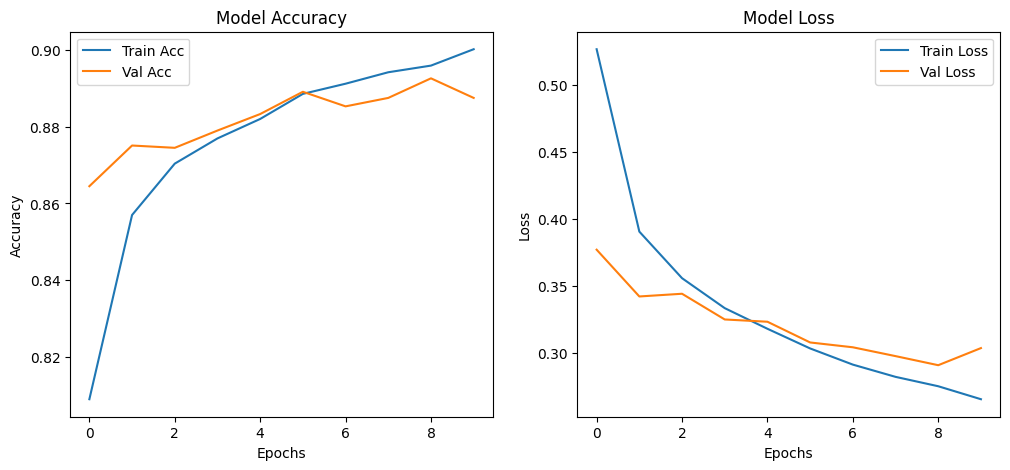

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


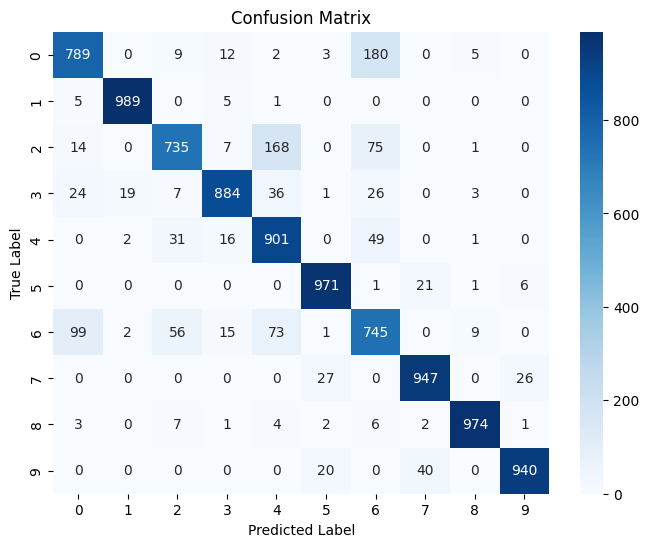


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1000
           1       0.98      0.99      0.98      1000
           2       0.87      0.73      0.80      1000
           3       0.94      0.88      0.91      1000
           4       0.76      0.90      0.82      1000
           5       0.95      0.97      0.96      1000
           6       0.69      0.74      0.72      1000
           7       0.94      0.95      0.94      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



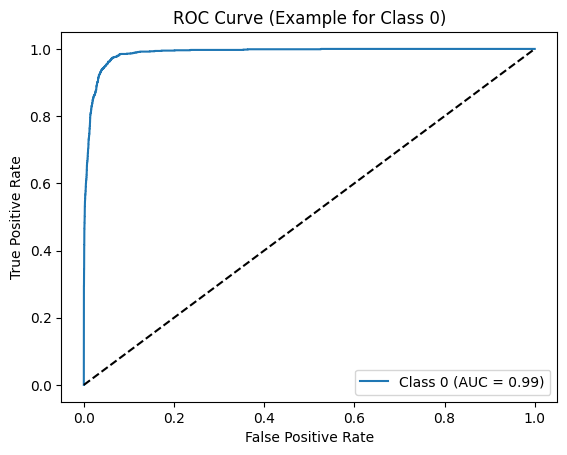

In [ ]:
# Experiment 6: Implementation of MLP on Fashion-MNIST

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import Adam

# 1. Dataset Loading (CSV format)
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

# Split features & labels
x_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# 2. Preprocessing
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Training data:", x_train.shape, y_train_cat.shape)
print("Testing data:", x_test.shape, y_test_cat.shape)

# 3. Build Sequential MLP Model
model = Sequential([
    Dense(512, activation="relu", input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# 4. Training
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat),
                    epochs=10, batch_size=128, verbose=2)

# 5. Visualize Model Architecture
plot_model(model, to_file="mlp_fashion.png", show_shapes=True, show_layer_names=True)

# 6. Accuracy & Loss Curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 7. Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 8. Performance Metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

# ROC Curve (One-vs-Rest)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[0], tpr[0], label=f"Class 0 (AUC = {roc_auc[0]:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.title("ROC Curve (Example for Class 0)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()